In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import itertools

## Элементы теории вероятностей

1\. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [27]:
for i in range(0,5):
    x = np.random.randint(0, 37) # от 0 до 36 включительно
    print(x)

19
35
23
16
26


2\.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки. 

Проверим на примере подбрасывания монетки. Так как события выпадения "орла" и "решки" несовместны, то сумма вероятностей их выпадения должна быть равна 1. 

In [28]:
n = 100 # количество подбрасываний монетки
X = np.random.randint(0, 2, size=n) # 0 - орёл, 1 - решка.

a = len(X[X == 0]) # число орлов
b = len(X[X == 1]) # число решек

pa = a / n
pb = b / n

print('Вероятность выпадения орла: %f, решки: %f. Сумма вероятностей: %f' % (pa, pb, pa+pb))

Вероятность выпадения орла: 0.490000, решки: 0.510000. Сумма вероятностей: 1.000000


2\.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. Постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

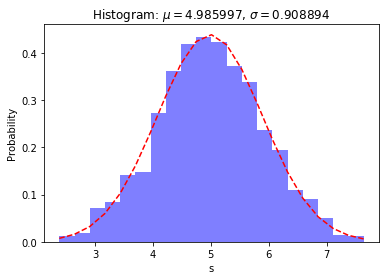

In [29]:
n = 10 # число испытаний
m = 1000 # число опытов в испытании

x0 = np.random.uniform(0, 1, size=m)
x1 = np.random.uniform(0, 1, size=m)
x2 = np.random.uniform(0, 1, size=m)
x3 = np.random.uniform(0, 1, size=m)
x4 = np.random.uniform(0, 1, size=m)
x5 = np.random.uniform(0, 1, size=m)
x6 = np.random.uniform(0, 1, size=m)
x7 = np.random.uniform(0, 1, size=m)
x8 = np.random.uniform(0, 1, size=m)
x9 = np.random.uniform(0, 1, size=m)

s = x0+x1+x2+x3+x4+x5+x6+x7+x8+x9
bins = 20
plt.hist(s, bins, density=1, facecolor='blue', alpha=0.5)

s_l = np.linspace(s.min(), s.max(), bins+1)
dens = sts.norm.pdf(s_l, loc=s.mean(), scale=s.std())
mu, sigma = sts.norm.fit(s)
plt.plot(s_l, dens, 'r--')

plt.xlabel('s')
plt.ylabel('Probability')
plt.title('Histogram: $\mu=%f$, $\sigma=%f$' % (mu, sigma))
plt.show()

Среднее значение равно 5, так как среднее значение в каждом испытании равно 0,5, а всего проводим 10 испытаний.

3\.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [30]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)

x = a + b + c + d

for i in range(0, n):
    if x[i] == 2:
        k = k + 1
        
print(k, n, k/n)

3728 10000 0.3728


$$
C_n^k = \frac{n!}{k!(n-k)!} \\
C_{4}^2 = \frac{4!}{2!2!} = 6
$$

$$
P_{n}(k) = C_{n}^k{p}^k{(1-p)}^{n-k} \\
P_{4}(2) = C_{4}^2{0.5}^2{0.5}^{2} = 0.375
$$

Результаты похожи.

3\.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [31]:
k = 0
for i in range(0, n):
    if x[i] == 1:
        k = k + 1
        
print(k, n, k/n)

2551 10000 0.2551


$$
C_{4}^1 = \frac{4!}{1!3!} = 4
$$

$$
P_{4}(1) = C_{4}^1{0.5}^1{0.5}^{3} = 0.25
$$

Результаты так же почти совпадают.

4\. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.

4\.1 Размещения $A_n^k=n(n-1)...(n-k+1)$.

Для $n=3, k=2: A_3^2=6$

In [32]:
for p in itertools.permutations("012", 2):
    print(''.join(p))

01
02
10
12
20
21


4\.2 Перестановки - то же самое что и размещения, но при n=k.
Для $n=3, k=3: A_3^3=6$

In [33]:
for p in itertools.permutations("012", 3):
    print(''.join(p))

012
021
102
120
201
210


4\.3 Сочетания $С_n^k=\frac{n!}{k!(n-k)!}$.

Для $n=3, k=2: С_3^2=3$

In [34]:
for p in itertools.combinations("012", 2):
    print(''.join(p))

01
02
12


5\. Дополните код расчетом коэффициента корреляции x и y по формуле

$$
R = \frac{\sum{(x_i-x_m)(y_i-y_m)}}{\sqrt{\sum{(x_i-x_m)^2}\sum{(y_i-y_m)^2}}}
$$

0.9107722026306009 0.0425812855397173
0.9107722026306003 0.04258128553971751


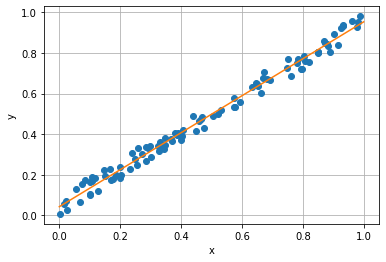

0.9943119860858893
0.9943119860858894


In [35]:
# Задаём два случайных вектора x и y с корреляцией r
n = 100
r = 0.9
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')

# Расчет коэффициентов зависимости y=ax+b

# в ручную
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y)) / (np.sum(x)**2 - n*np.sum(x**2))
b = (np.sum(y) - a*np.sum(x)) / n
print(a,b)

# с помощью библиотеки
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(a1, b1)

# Построение графиков
plt.plot([0, 1], [b, a+b])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# Расчет коэффицииента корреляции

# в ручную
r = np.sum( (x-x.mean()) * (y-y.mean()) ) / np.sqrt( np.sum((x-x.mean())**2) * np.sum((y-y.mean())**2) )
print(r)

# с помощью библиотеки
r1 = np.corrcoef(x, y)[0, 1]
print(r1)

Рассчитанные в ручную и с помощью библиотек, коэффициенты корреляции совпадают.

6\. Чтобы не потерялось, оставлю это тут как пример.

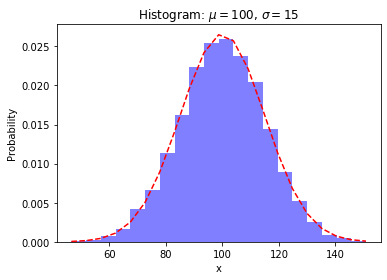

In [36]:
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)
bins = 20
plt.hist(x, bins, density=1, facecolor='blue', alpha=0.5)

xmin, xmax = x.min(), x.max()
x_l = np.linspace(xmin, xmax, bins+1)
dens = sts.norm.pdf(x_l, loc=mu, scale=sigma)
mu, sigma = sts.norm.fit(x)
plt.plot(x_l, dens, 'r--')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram: $\mu=100$, $\sigma=15$')
plt.subplots_adjust(left=0.15)
plt.show()